In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import csv

In [2]:
# function to read file from csv 
def load_data(csv_file="DataSet.csv"):
    data = [] 
    with open(csv_file, 'r') as file: 
        for line in csv.DictReader(file): 
            data.append(line) 
    return data

# function to write dict to file
def write_data(data, csv_file="DataSet.csv"):
    csv_columns = list(data[0].keys())
    try:
        with open(csv_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
            writer.writeheader()
            for line in data:
                writer.writerow(line)
    except IOError:
        print("I/O error")

data = load_data()

In [26]:
# function to index values returned into array predicatably
def relevant_index(val):
    if(val == -8):
        return 0
    return val

def count(field_label):
    activity = list()
    activity = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


    for row in data:
        try:
            pre=int(row[field_label])
            activity[relevant_index(pre)] += 1

        except Exception as e:
            print(row[field_label])
    print(activity)
    return activity

[49, 351, 49, 115, 0, 0, 0, 0, 0, 0]
[36, 20, 25, 24, 295, 60, 80, 24, 0, 0]


[Text(0.2, 0, 'Commute Everyday'),
 Text(1.2, 0, 'Telework'),
 Text(2.2, 0, 'P-Telecommute'),
 Text(3.2, 0, 'Work from home'),
 Text(4.2, 0, 'Reduced workload'),
 Text(5.2, 0, 'Increased workload'),
 Text(6.2, 0, 'no work'),
 Text(7.2, 0, 'N/A')]

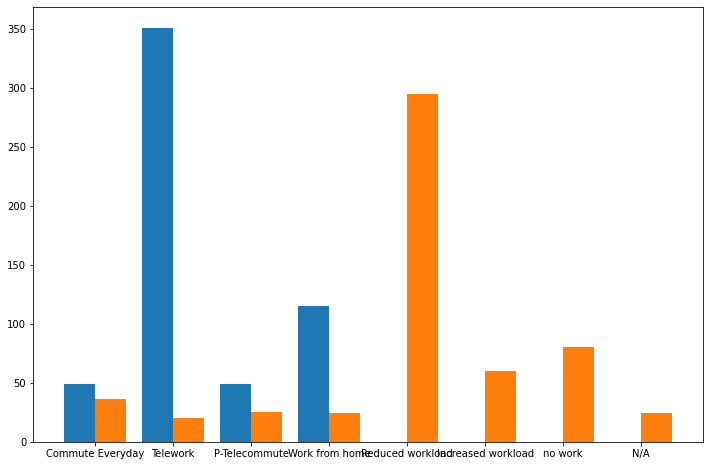

In [28]:
travel_time = dict()
travel_time["pre"] = count('commute_before')[:-2]
travel_time["post"] = count('commute_after')[:-2]

plt.rcParams["figure.figsize"] = (30,10)

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(travel_time["post"]))

bar_width = 0.4
b1 = ax.bar(x, travel_time["pre"], width=bar_width)
b2 = ax.bar(x + bar_width, travel_time["post"] , width=bar_width)

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)



ax.set_xticklabels(["Commute Everyday", "Telework", "P-Telecommute", "Work from home", "Reduced workload", "Increased workload", "no work", "N/A"])

[0, 85, 177, 172, 130, 0, 0, 0, 0, 0]
[0, 95, 150, 130, 189, 0, 0, 0, 0, 0]


Text(0.5, 1.0, 'Exercise Before and After Covid-19 ')

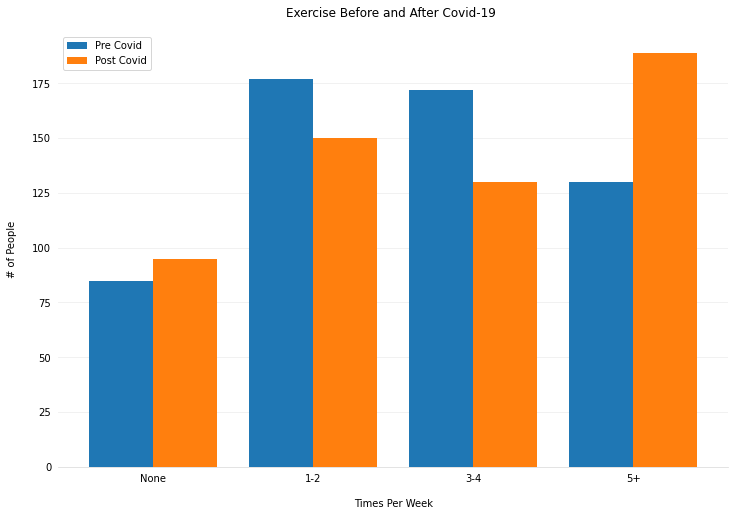

In [38]:
activity = dict()
activity["pre"] = count('Exe_Before')[1:-5]
activity["post"] = count('PhyAc_After')[1:-5]


fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(activity["post"]))

bar_width = 0.4
b1 = ax.bar(x, activity["pre"], width=bar_width, label='Pre Covid')
b2 = ax.bar(x + bar_width, activity["post"] , width=bar_width, label='Post Covid')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["None", "1-2", "3-4", "5+"])

ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Times Per Week', labelpad=15)
ax.set_ylabel('# of People', labelpad=15)
ax.set_title('Exercise Before and After Covid-19 ', pad=15)


N/A
[0, 67, 132, 232, 132, 0, 0, 0, 0, 0]
[0, 111, 125, 65, 74, 52, 44, 93, 0, 0]


Text(0.5, 1.0, 'Aproximate Daily Exercise Before and After Covid-19 ')

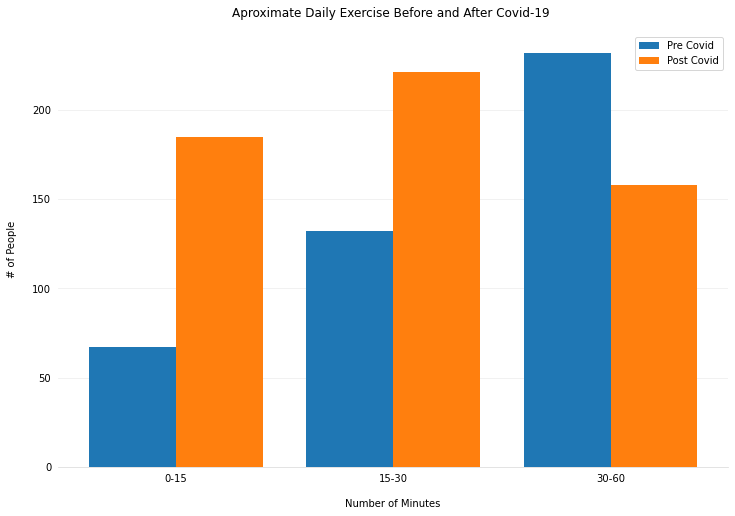

In [56]:
activity = dict()
activity["pre"] = count('PhyAc_Before')[1:-6]
temp = count('Exe_After')

# based on hand calculated averages for what each data point approx represents  
activity["post"] = [temp[1] + temp[4], temp[2] + temp[5] + temp[6], temp[3] + temp[7]] 


fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(activity["post"]))

bar_width = 0.4
b1 = ax.bar(x, activity["pre"], width=bar_width, label='Pre Covid')
b2 = ax.bar(x + bar_width, activity["post"] , width=bar_width, label='Post Covid')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(["0-15", "15-30", "30-60"])

ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Number of Minutes', labelpad=15)
ax.set_ylabel('# of People', labelpad=15)
ax.set_title('Aproximate Daily Exercise Before and After Covid-19 ', pad=15)


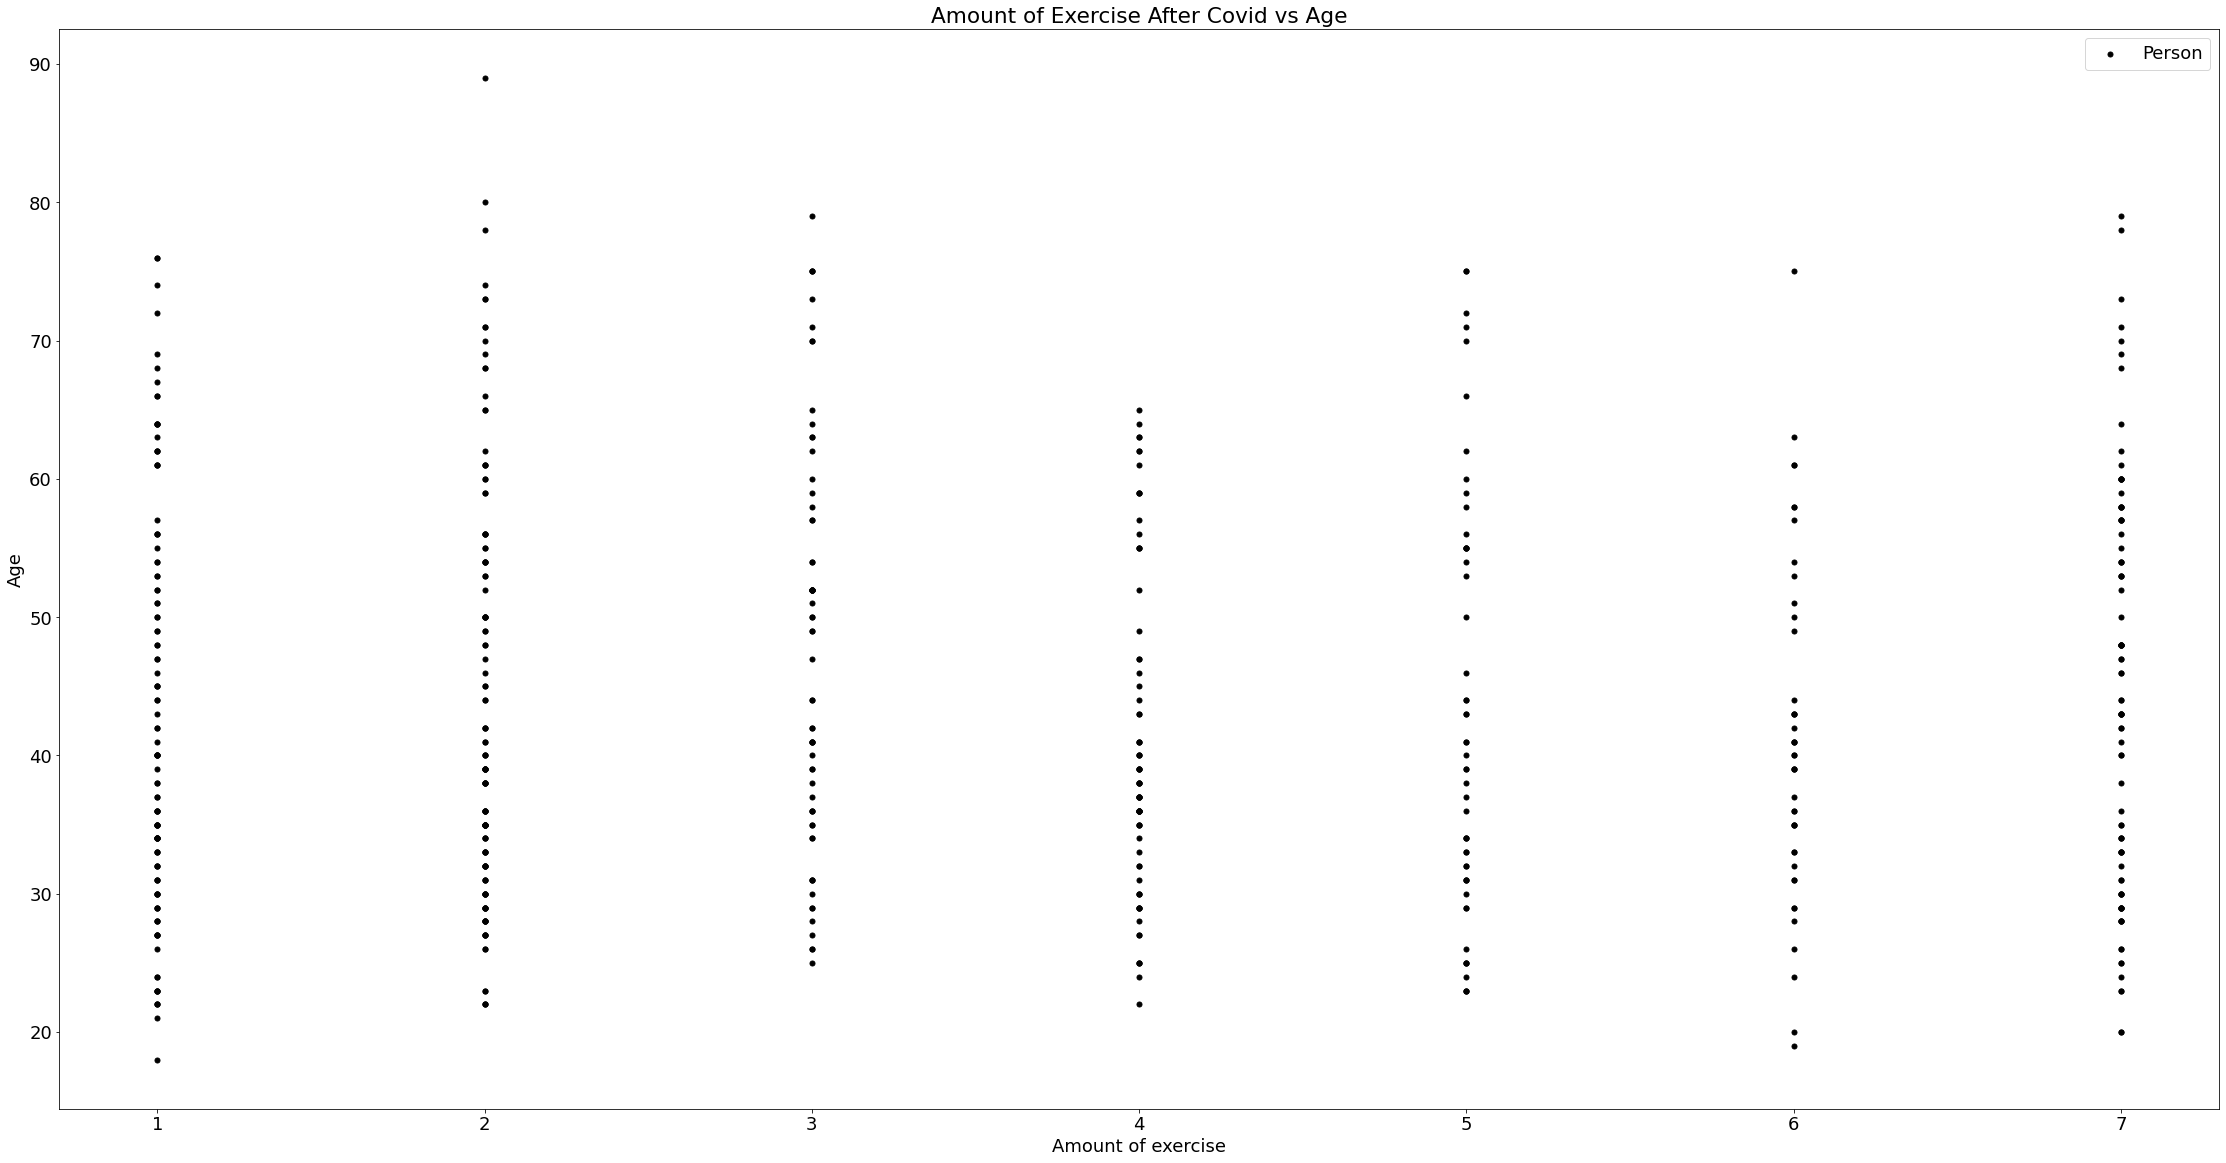

In [101]:
#exercise_range = [0, 10, 20, 30, 40, 50, 60]
'''
ages = [""]*100
for row in data:
    try:
        age=int(row['Age'])
        ages[age] += row['Exe_After'] + " "
            
    except Exception as e:
        #print(e)
        pass
for i in range(len(ages)):
    ages[i] = ages[i][:-1].split()
    for j in range(len(ages[i])):
        ages[i][j] = int(ages[i][j])
    
'''
ages = list()
exe = list()
for row in data:
    try:
        age=int(row['Age'])
        if(age > 100 or age < 15):
            continue
        ages.append(age)
        exe.append(int(row['Exe_After']))
            
    except Exception as e:
        #print(e)
        pass
plt.rcParams['font.size'] = 18.0

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(exe, ages, label='Person', color='k', s=25, marker="o")
ax.legend()

ax.set_xlabel('Amount of exercise')
ax.set_ylabel('Age')
ax.set_title('Amount of Exercise After Covid vs Age')
plt.show()


[0, 111, 125, 65, 74, 52, 44, 93, 0, 0]


Text(0.5, 1.0, 'Likelyhood to Shop online post pandemic')

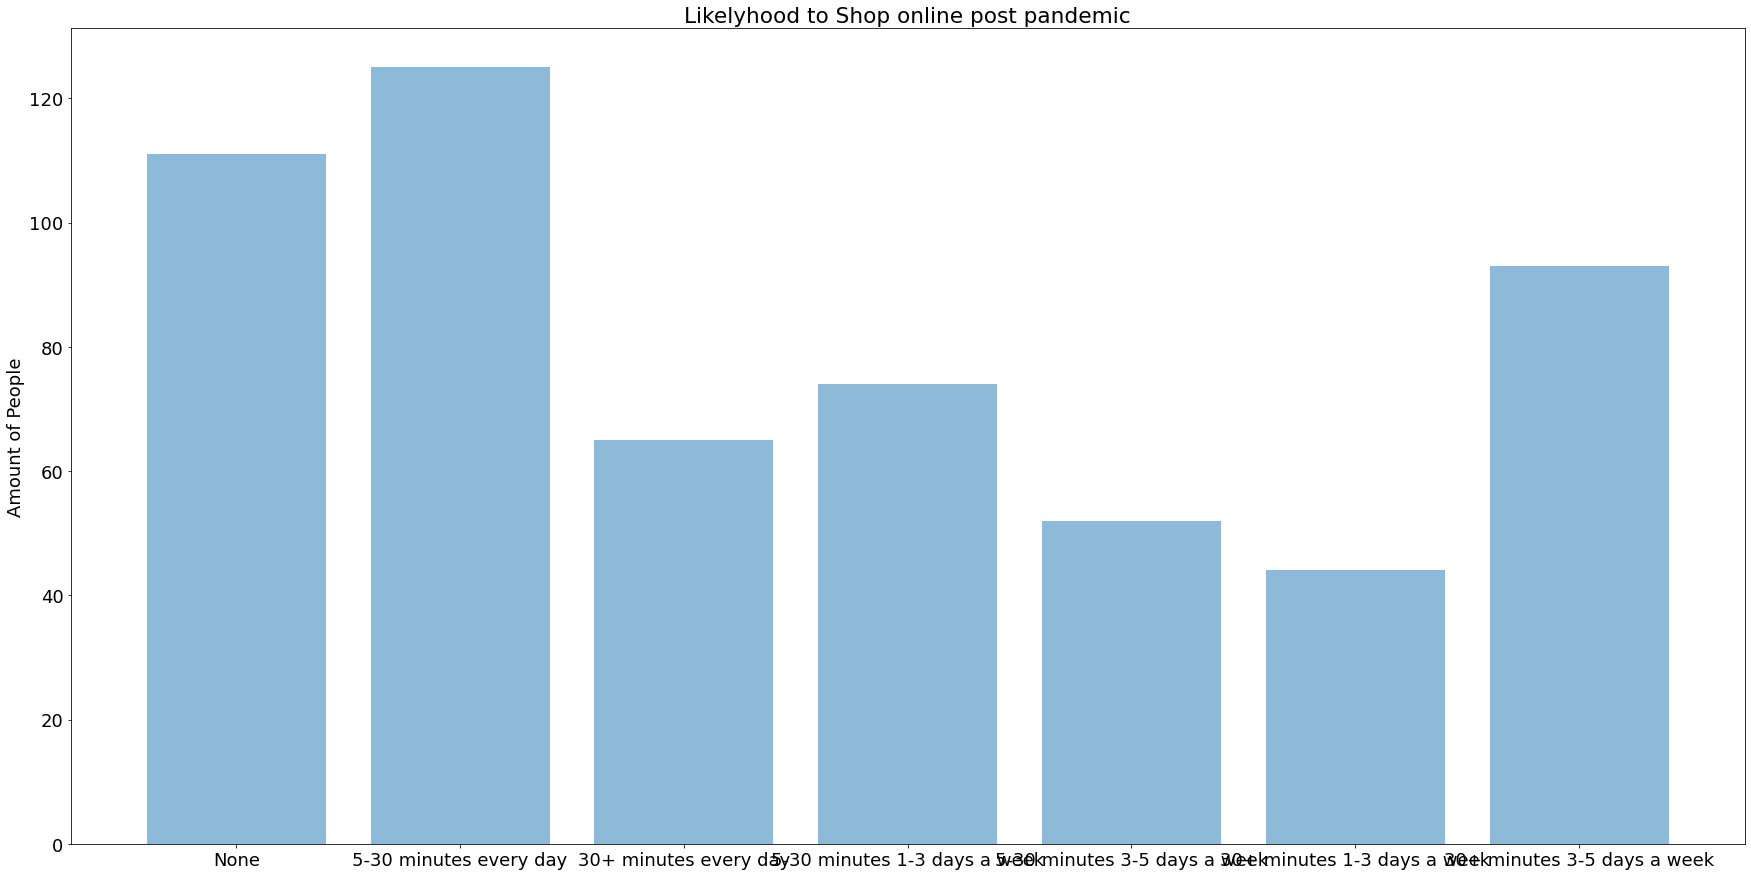

In [115]:
names = ["None", '5-30 minutes every day', '30+ minutes every day','5-30 minutes 1-3 days a week',"5-30 minutes 3-5 days a week","30+ minutes 1-3 days a week","30+ minutes 3-5 days a week"]
vals = count('Exe_After') [1:-2]
        
plt.bar(names, vals, align='center', alpha=0.5)
#plt.xticks(y_pos, find_max)
plt.ylabel('Amount of People')
plt.title('Likelyhood to Shop online post pandemic')

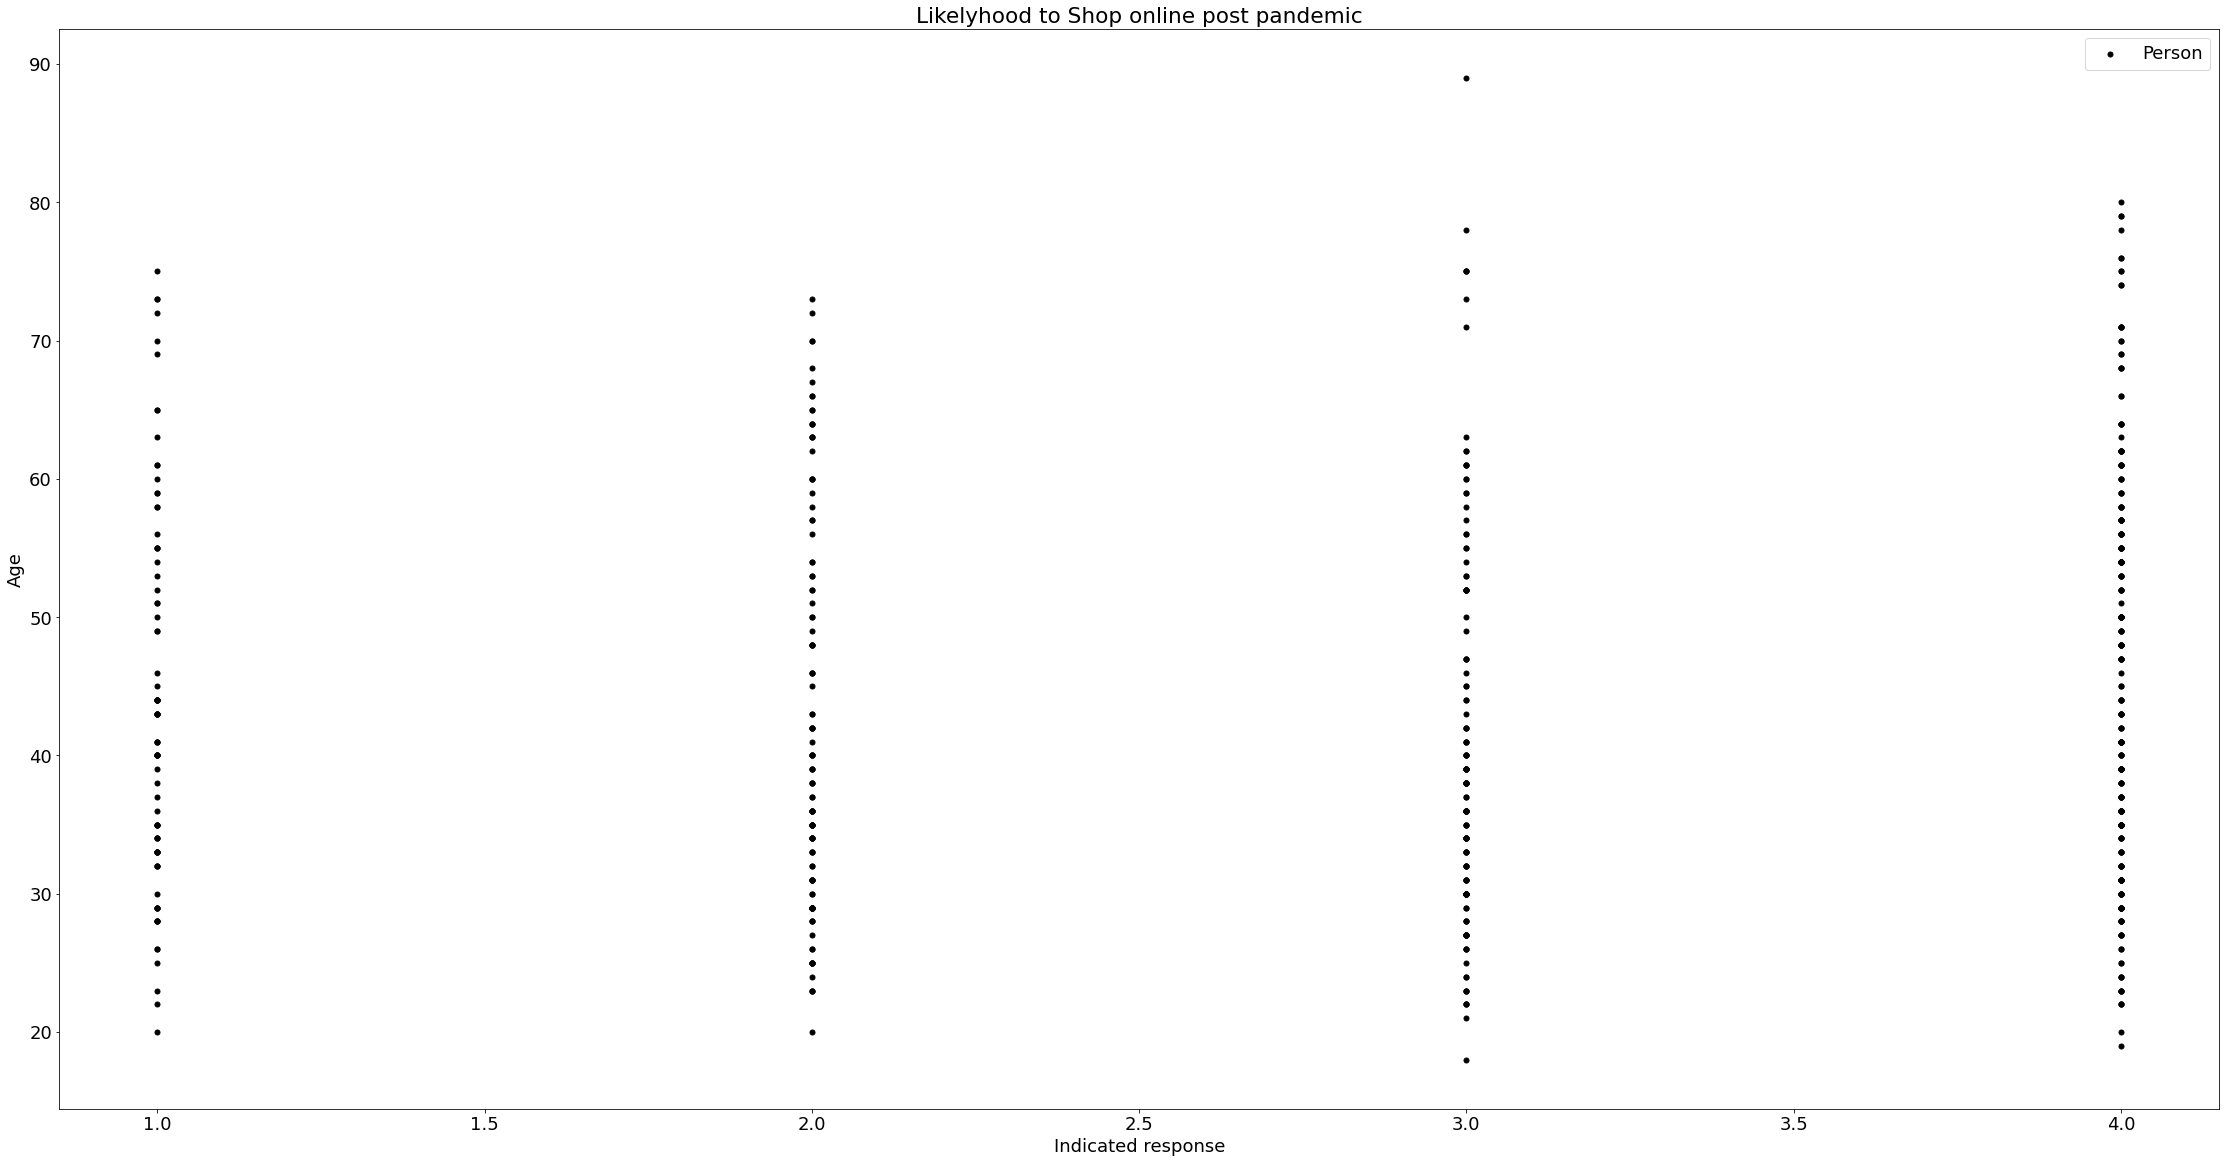

In [110]:
#exercise_range = [0, 10, 20, 30, 40, 50, 60]
'''
ages = [""]*100
for row in data:
    try:
        age=int(row['Age'])
        ages[age] += row['Exe_After'] + " "
            
    except Exception as e:
        #print(e)
        pass
for i in range(len(ages)):
    ages[i] = ages[i][:-1].split()
    for j in range(len(ages[i])):
        ages[i][j] = int(ages[i][j])
    
'''
ages = list()
exe = list()
for row in data:
    try:
        age=int(row['Age'])
        if(age > 100 or age < 15):
            continue
        ages.append(age)
        exer = int(row['ONL_SHP_AFTR'])
        if(exer == -8):
            exe.append(4)
            continue
        exe.append(int(row['ONL_SHP_AFTR']))
            
    except Exception as e:
        #print(e)
        pass
    
names = ["2", '3', '4','5']
plt.rcParams['font.size'] = 18.0

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(exe, ages, label='Person', color='k', s=25, marker="o")
ax.legend()

ax.set_xlabel('Indicated response')
ax.set_ylabel('Age')
ax.set_title('Likelyhood to Shop online post pandemic')
plt.show()

[232, 84, 118, 130, 0, 0, 0, 0, 0, 0]


Text(0.5, 1.0, 'Likelyhood to Shop online post pandemic')

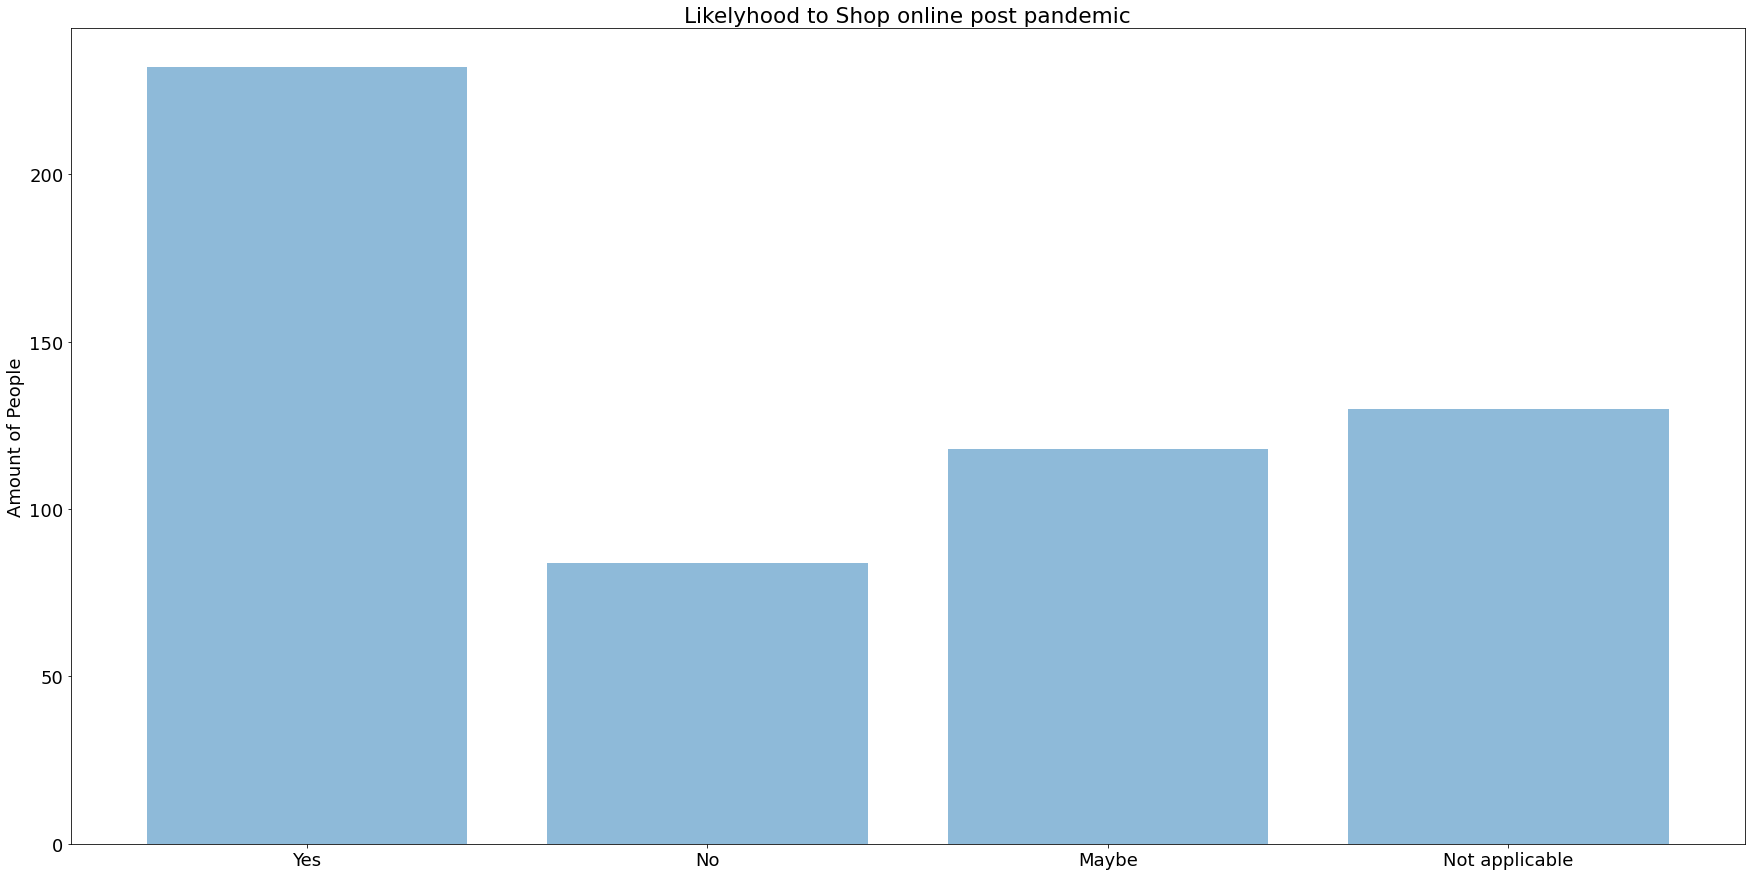

In [111]:
names = ["Yes", 'No', 'Maybe','Not applicable']
vals = count('ONL_SHP_AFTR')[:-6]
        
plt.bar(names, vals, align='center', alpha=0.5)
#plt.xticks(y_pos, find_max)
plt.ylabel('Amount of People')
plt.title('Likelyhood to Shop online post pandemic')